In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def gaussEliminationLS( m, n, a, x):
    for i in range(m-1):
        for k in range(m):
            if abs(a[i][i]<abs(a[k][i])):
                for j in range(n):
                    temp= a[i][j]
                    a[i][j]= a[k][j]
                    a[k][j]= temp
        
        for k in range(i+1,m):
            term = a[k][i]/a[i][i]
            for j in range(n):
                a[k][j]= a[k][j]-term*a[i][j]
    for i in range(m-1,-1,-1):
        x[i] = a[i][n-1]
        for j in range(i+1,n-1):
            x[i] = x[i]-a[i][j]*x[j]
        x[i]= x[i]/a[i][i]
    return x
    

In [3]:
def cSCoeffCalc(n,h,sig,y,a,b,c,d):
    for i in range(n):
        d[i]=y[i]
        b[i]=sig[i]/2.0
        a[i]=(sig[i+1]-sig[i])/(h[i]*6.0)
        c[i]=(y[i+1]-y[i])/h[i]-h[i]*(2*sig[i]+sig[i+1])/6.0

In [4]:
def tridiagonalCubicSplineGen(n,h,a,y):
    for i in range(n-1):
        a[i][i]=2*(h[i]+h[i+1])
    
    for i in range(n-2):
        a[i][i+1]=h[i+1]
        a[i+1][i]=h[i+1]
    for i in range(1,n):
        a[i-1][n-1]=(y[i+1]-y[i])*6/h[i]-(y[i]-y[i-1])*6/h[i-1]
    


In [5]:
def printMatrix(m, n, matrix):
    ss=""
    for i in range(m):
        for j in range(n):
            ss+=str(matrix[i][j])+" "
        print(ss);
        

In [6]:
def copyMatrix( m, n, matrix1, matrix2):
    for i in range(m):
        for j in range(n):
            matrix2[i][j]=matrix1[i][j]


The tridiagonal system for the Natural spline is:


5.0 1.5 0.0 0.0 0.0 0.0 -5.600000000000001 
5.0 1.5 0.0 0.0 0.0 0.0 -5.600000000000001 1.5 5.2 1.1 0.0 0.0 0.0 -4.872727272727273 
5.0 1.5 0.0 0.0 0.0 0.0 -5.600000000000001 1.5 5.2 1.1 0.0 0.0 0.0 -4.872727272727273 0.0 1.1 5.0 1.4 0.0 0.0 3.444155844155844 
5.0 1.5 0.0 0.0 0.0 0.0 -5.600000000000001 1.5 5.2 1.1 0.0 0.0 0.0 -4.872727272727273 0.0 1.1 5.0 1.4 0.0 0.0 3.444155844155844 0.0 0.0 1.4 6.8 2.0 0.0 7.088571428571429 
5.0 1.5 0.0 0.0 0.0 0.0 -5.600000000000001 1.5 5.2 1.1 0.0 0.0 0.0 -4.872727272727273 0.0 1.1 5.0 1.4 0.0 0.0 3.444155844155844 0.0 0.0 1.4 6.8 2.0 0.0 7.088571428571429 0.0 0.0 0.0 2.0 6.199999999999999 1.0999999999999996 -3.169090909090909 
5.0 1.5 0.0 0.0 0.0 0.0 -5.600000000000001 1.5 5.2 1.1 0.0 0.0 0.0 -4.872727272727273 0.0 1.1 5.0 1.4 0.0 0.0 3.444155844155844 0.0 0.0 1.4 6.8 2.0 0.0 7.088571428571429 0.0 0.0 0.0 2.0 6.199999999999999 1.0999999999999996 -3.169090909090909 0.0 0.0 0.0 0.0 1.09999999999999

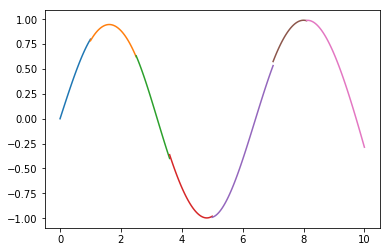

In [7]:

x= np.array([0,1,2.5,3.6,5,7,8.1,10])    
y= np.array([0,.8,.6,-.44,-.96,.66,.97,-.54])    

m= x.shape[0]
n= m-1
h = np.zeros((n,1))
for i in range(n):
    h[i]=x[i+1]-x[i]

a = np.zeros((n,1))
b = np.zeros((n,1))
c = np.zeros((n,1))
d = np.zeros((n,1))
sig = np.zeros((n+1,1))
sigTemp = np.zeros((n-1,1))

sig[0]=0
sig[n]=0
tri = np.zeros((n-1,n))                
tridiagonalCubicSplineGen(n,h,tri,y)   
print("The tridiagonal system for the Natural spline is:\n\n")
printMatrix(n-1,n,tri)
# Perform Gauss Elimination 

gaussEliminationLS(n-1,n,tri,sigTemp)
for i in range(1,n):
    sig[i]=sigTemp[i-1]
# Print the values of Si's
for i in range(n+1):
    print("\nSig["+str(i)+"]= " +str(sig[i]))

# calculate the values of ai's, bi's, ci's, and di's
cSCoeffCalc(n,h,sig,y,a,b,c,d);
print("The equations of cubic interpolation polynomials between the successive intervals are:\n\n")


for i in range(n):
    print("P"+str(i)+"(x) b/w ["+str(x[i])+","+str(x[i+1])+"] = "+str(a[i])+"*(x-"+str(x[i])+")^3+"+str(b[i])+"*(x-"+str(x[i])+")^2+"+str(c[i])+"*(x-"+str(x[i])+")+"+str(d[i])+"\n")
    function = lambda x: (a[i]*(x-x[i])**3+b[i]*(x-x[i])**2+c[i]*(x-x[i])+d[i])
    X= np.linspace(x[i],x[i+1])
    plt.plot(X,function(X))

plt.show()

    
